In [541]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [542]:
from scipy.stats import norm 


In [543]:
from datetime import datetime, time
import pandas_datareader.data as pdr
#import yfinance as yf

In [466]:
import yfinance as yf

In [529]:
def black_scholes(s0, k, r, t, sigma, y, option_type):
    T = t/365  #daily to yearly 
    s = s0 * np.exp(-y*T)
    print(s)
    d1 = (np.log(s0/k) + (((r-y) + (sigma**2)/2)*T))/ (sigma * np.sqrt(T))
    d2 = d1 - (sigma * np.sqrt(T))
    #if d1<0:
    #    n_d1 = 1- norm.cdf(-d1)
    #else:
    #    n_d1 = norm.cdf(d1)
    #if d2<0:
    #    n_d2 = 1- norm.cdf(-d2)
    #else:
     #   n_d2 = norm.cdf(d2)
    #n_d1 = norm.cdf(-d1)
    #n_d2 = norm.cdf(-d2)
    

    #opt = stock.option_chain(expiry)
    #print(opt)
    #vol=0.001*np.arange(1,1001)
   
   #calculating option price and implied volatility
    if option_type == 'Call':
        value = s*norm.cdf(d1,0,1)- k * np.exp(-r*T) * norm.cdf(d2,0,1) 
        #opt_value = opt.calls
        #price = opt_value.loc[opt_value.strike == k, 'lastPrice'].values[0]
        #print(price)
        #im_vol = abs(value - price)*0.1
           

    else:
        print(option_type)
        value =  (k * np.exp(-r *t)* norm.cdf(-d2,0,1)) - (s* norm.cdf(-d1,0,1))
        print("k * np.exp(-r *t)* norm.cdf(-d2,0,1)",k * np.exp(-r *t)* norm.cdf(-d2,0,1))
        print("s* norm.cdf(-d1,0,1)", s* norm.cdf(-d1,0,1))

        #print(value)
        #opt_value = opt.puts
        #price = opt_value.loc[opt_value.strike == k, 'lastPrice'].values[0]
        #im_vol = abs(value - price)*0.1
        
        
    
    # calculating break even point
    if option_type == 'Call': 
        bep = k + value
    else:
        bep = k - value
        
    #delta
    if y >0.0 and T > 0.0:
        yfac = np.exp(-y*T)
    else:
        yfac = 1.0
    
    if option_type == 'Call' : delta = yfac * norm.cdf(d1) 
    else:  delta = yfac* (norm.cdf(d1) -1)
    
    #gamma
    gamma = (yfac * norm.pdf(d1)) /(s0 * sigma * np.sqrt(T))
    
    #theta
    if option_type =='Call':
        theta = (-((s * norm.pdf(d1)*sigma)/(2*np.sqrt(T)) + r * k *np.exp(-r*T)*norm.cdf(d2) - y*s*norm.cdf(d1)))/252
    else:
        theta = (-((s * norm.pdf(d1)*sigma)/(2*np.sqrt(T)) - r * k* np.exp(-r*T)*norm.cdf(d2,0,1) +  y*s*norm.cdf(-d1)))/252
    
    #vega
    vega = (s* np.sqrt(T) * norm.pdf(d1))/100
    
    #rho
    if option_type == 'Call':
        rho =( k * T * np.exp(-r*T)*norm.cdf(d2))/100
    else:
        rho = (-(k * T * np.exp(-r*T)*norm.cdf(-d2,0,1)))/100

    #implied volatility # , "implied volatility  " :im_vol.round(4)

    option_values = {
        "option_type" : option_type,
        "premium" : value.round(4), "Breakeven point": bep.round(4),  "detla" :  delta.round(4), "gamma" : gamma.round(4), 
        "theta" : theta.round(4), "vega" : vega.round(4),'rho' :  rho.round(4)
}
    
    return option_values

In [468]:
import math

In [469]:
def black_scholes_1(S, K, T,y, r, sigma, option='call'):
    d1 = (math.log(S / K) + ((r-y) + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = (math.log(S / K) + ((r-y) - 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    
    if option == 'call':
        return S *norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    if option == 'put':
        return K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

In [470]:
def BS(s,k,r,t,sigma,type='C'):
    T = t/252
    d1 =  (np.log(s/k) + ((r + sigma**2/2)*T))/ (sigma * np.sqrt(T))
    d2 =  d1 - (sigma * np.sqrt(T))
    try:
        if type == 'C':
            price = s*norm.cdf(d1,0,1) -k*np.exp(-r*T)*norm.cdf(d2,0,1)
        elif type == 'P':
            price = k * np.exp(-r * T) * norm.cdf(-d2,0,1) - s * norm.cdf(-d1,0,1)
    except:
        print("Please input correct parameters")
    
    return price

##### Ticker and expiry date

In [471]:
ticker = 'NVDA'
expiry_date = '09-20-2024'


In [472]:
today = datetime.now().date()
one_year_ago = today.replace(year = today.year-1)

In [473]:
stock = yf.Ticker(ticker)
df = yf.download(ticker,start = one_year_ago, end = today,rounding = True)


[*********************100%%**********************]  1 of 1 completed


In [474]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-28,46.48,46.98,44.89,46.83,46.82,685192000
2023-08-29,46.67,49.08,46.39,48.78,48.77,701397000
2023-08-30,49.04,49.93,48.42,49.26,49.25,735206000
2023-08-31,49.38,49.74,48.96,49.35,49.34,528570000
2023-09-01,49.76,49.80,48.14,48.51,48.49,463830000


In [476]:
df_returns = pd.DataFrame()
df_returns['Close'] = df['Close']

In [477]:
df_returns.head()

,Close
Date,
2023-08-28,46.83
2023-08-29,48.78
2023-08-30,49.26
2023-08-31,49.35
2023-09-01,48.51


In [478]:
#calculating returns
df_returns['returns'] = df_returns['Close'].pct_change()

In [479]:
df_returns['cum_ret'] = (df_returns['returns'] +1).cumprod()


In [480]:
df_returns.dropna().head()

,Close,returns,cum_ret
Date,,,
2023-08-29,48.78,0.041640,1.041640
2023-08-30,49.26,0.009840,1.051890
2023-08-31,49.35,0.001827,1.053812
2023-09-01,48.51,-0.017021,1.035874
2023-09-05,48.55,0.000825,1.036729


In [481]:
log_returns = np.log(df_returns['Close']/df_returns['Close'].shift(1)).dropna()


In [482]:
df_returns['log_returns'] = log_returns
df_returns.head()

,Close,returns,cum_ret,log_returns
Date,,,,
2023-08-28,46.83,NaN,NaN,NaN
2023-08-29,48.78,0.041640,1.041640,0.040796
2023-08-30,49.26,0.009840,1.051890,0.009792
2023-08-31,49.35,0.001827,1.053812,0.001825
2023-09-01,48.51,-0.017021,1.035874,-0.017168


#### Plotting returns

<Axes: xlabel='Date', ylabel='Close'>

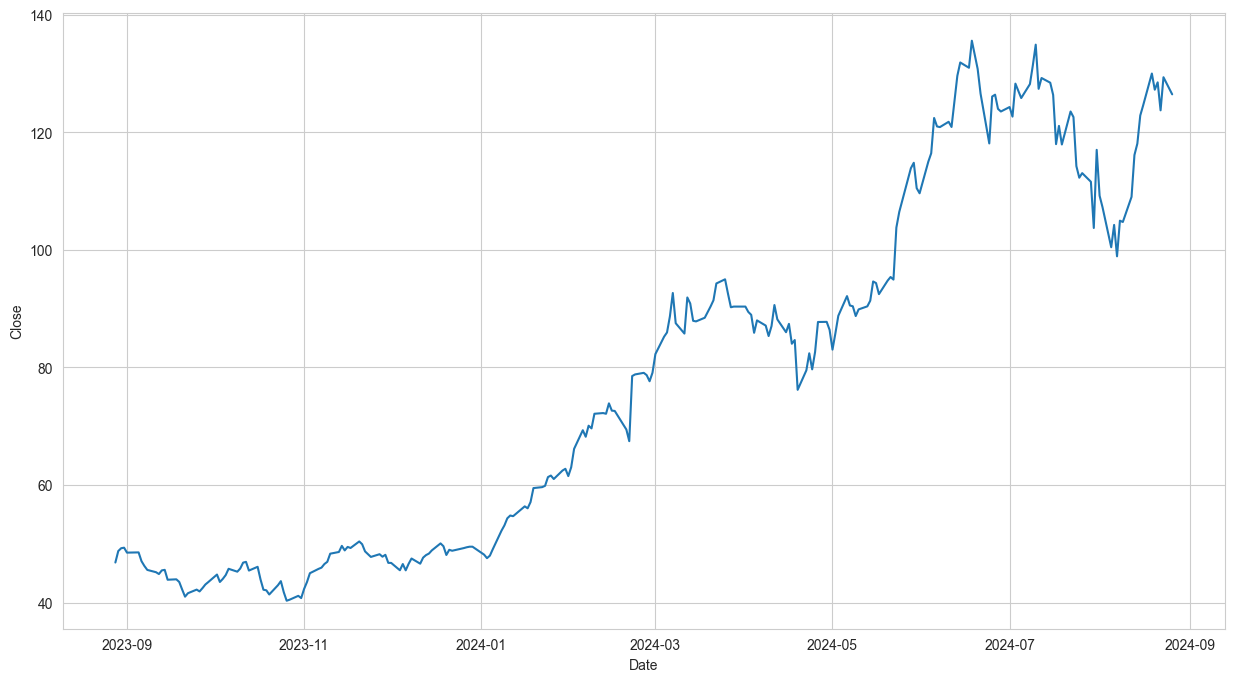

In [483]:
#Visualize the price
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.lineplot(data = df_returns['Close'] )

<Axes: xlabel='Date', ylabel='log_returns'>

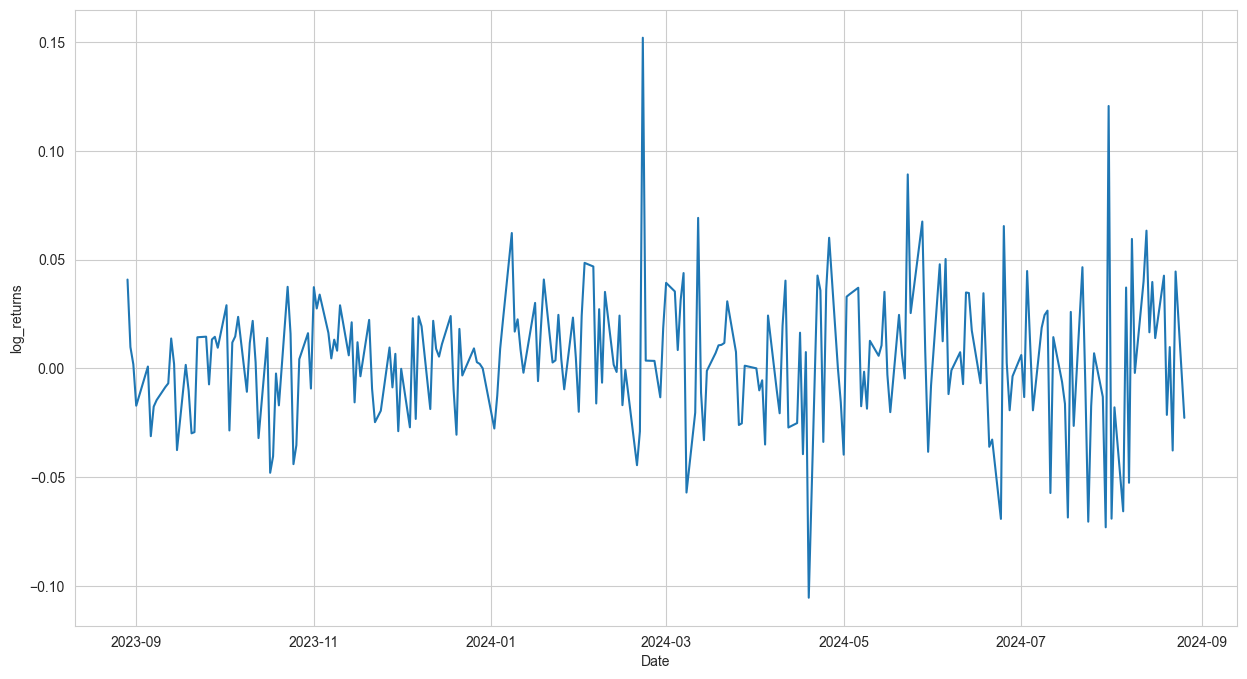

In [484]:
#Visualizing log return
plt.figure(figsize=(15,8))
sns.lineplot(data = df_returns['log_returns'])

<Axes: xlabel='Date', ylabel='cum_ret'>

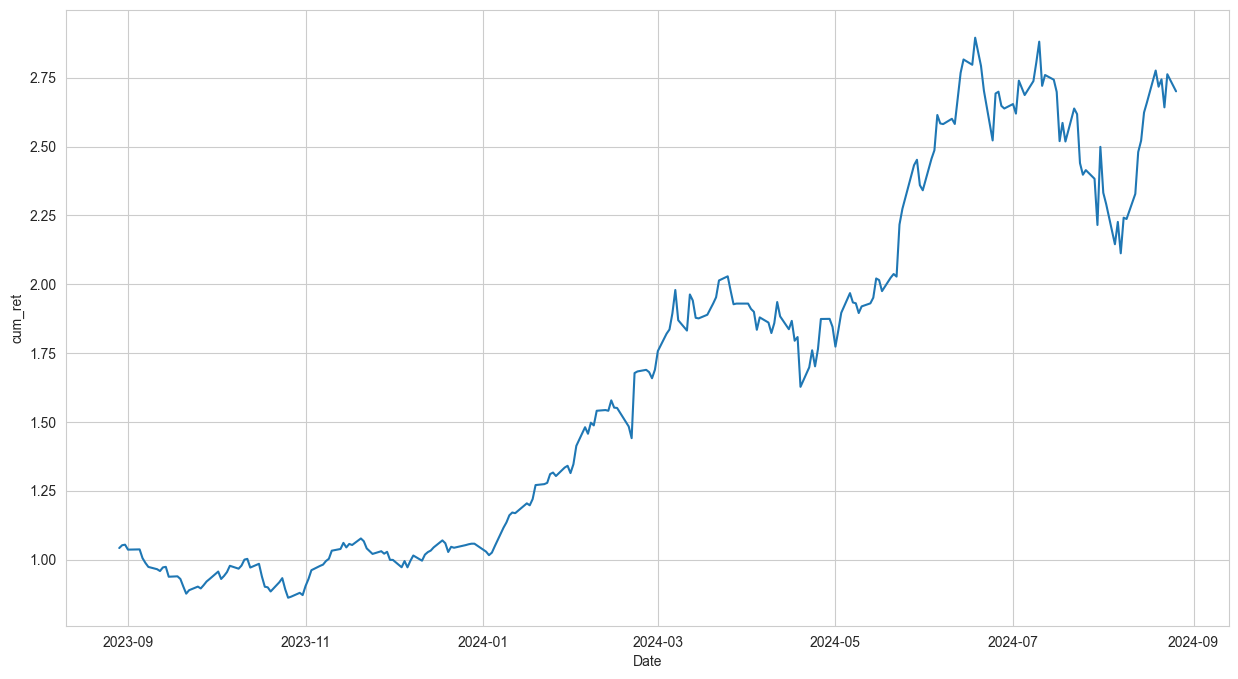

In [485]:
#Visualizing return
plt.figure(figsize=(15,8))
sns.lineplot(data = df_returns['cum_ret'])

Annualised dividend

In [486]:
dividends = stock.history(start= one_year_ago, end = today)['Dividends']
#type(dividends)
annual_div = dividends.sum()
print(annual_div)

0.022


In [487]:
stock.info


{'address1': '2788 San Tomas Expressway',
 'city': 'Santa Clara',
 'state': 'CA',
 'zip': '95051',
 'country': 'United States',
 'phone': '408 486 2000',
 'website': 'https://www.nvidia.com',
 'industry': 'Semiconductors',
 'industryKey': 'semiconductors',
 'industryDisp': 'Semiconductors',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': "NVIDIA Corporation provides graphics and compute and networking solutions in the United States, Taiwan, China, Hong Kong, and internationally. The Graphics segment offers GeForce GPUs for gaming and PCs, the GeForce NOW game streaming service and related infrastructure, and solutions for gaming platforms; Quadro/NVIDIA RTX GPUs for enterprise workstation graphics; virtual GPU or vGPU software for cloud-based visual and virtual computing; automotive platforms for infotainment systems; and Omniverse software for building and operating metaverse and 3D internet applications. The Compute & Networki

In [488]:
#Dividend yield
div_yield = stock.info['dividendYield']
print(div_yield*100)

0.029999999000000003


##### Sigma 

In [489]:
#one year volatility
sigma = (df_returns['log_returns'].std())*np.sqrt(252)
print(sigma)

0.4939195642389393


In [533]:
sigma_1 = (df_returns['returns'].std())*np.sqrt(252)
print(sigma_1)

0.4990837125282763


In [490]:
def returns(window,trading_periods):
    result = log_returns.rolling(window,center=False).std()* np.sqrt(trading_periods)
    return result*100

In [535]:
type(df_returns['returns'])

pandas.core.series.Series

In [536]:
def returns_normal(window,trading_periods):
    result = df_returns['returns'].rolling(window,center=False).std()* np.sqrt(trading_periods)
    return result*100

In [537]:
returns_normal(20,252)

Date
2023-08-28          NaN
2023-08-29          NaN
2023-08-30          NaN
2023-08-31          NaN
2023-09-01          NaN
                ...    
2024-08-20    84.096747
2024-08-21    79.782634
2024-08-22    80.885052
2024-08-23    82.088143
2024-08-26    82.478646
Name: returns, Length: 251, dtype: float64

In [495]:
vol =[]
vol= returns(20,252).to_list()
print(vol[-1])

81.52118203599966


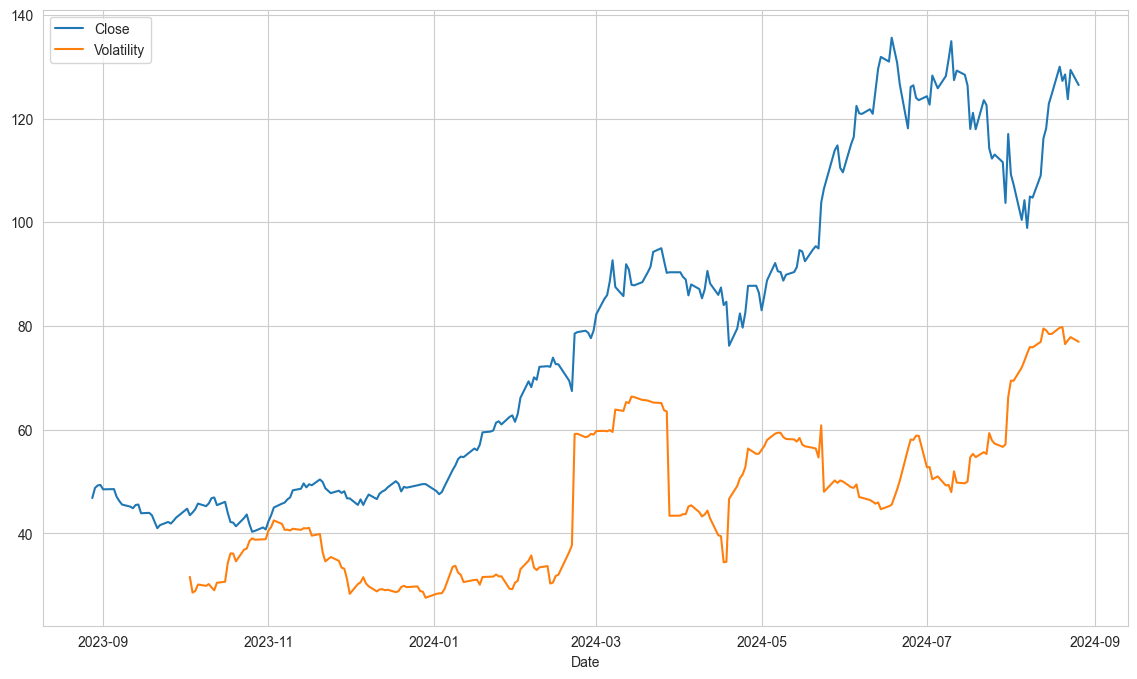

In [440]:
#Visualizing the volatility
plt.figure(figsize=(14,8))
plt.plot(df_returns.index, df_returns['Close'], label="Close")
plt.plot( returns(25,252), label='Volatility')
plt.xlabel('Date')
plt.legend(loc=2)

#### Risk-free rate

In [524]:
#risk-free rate, as the 6 month U.S. treasury yield which could get from ^TNX
r = 0.0538*100
print(r)

5.38


In [538]:
def get_10yr_treasury_rate():
    # 10 year treasury ticker symbol
    treasury_ticker = "^TNX"
    now = datetime.now()
    ten_years_ago = now.replace(year=now.year - 10)
    treasury_data = yf.download(treasury_ticker, start=ten_years_ago, end=now)
    last_yield = treasury_data['Close'].iloc[-1]
    return last_yield

In [539]:
last_yield = get_10yr_treasury_rate()
print(last_yield)

[*********************100%%**********************]  1 of 1 completed

3.8410000801086426


#### Current stock price

In [540]:
#current stock price
s = df_returns['Close'].iloc[-1]
print(s)

126.46


#### Time

In [505]:
# time remaining untill expiration in days
t = (datetime.strptime(expiry_date, "%m-%d-%Y") - datetime.utcnow()).days +1
t

24

In [506]:
#volatility for remaining time
t_years = t/365
v_t = sigma*np.sqrt(t_years)
print(v_t)

0.12665298143159226


#### Strike price

In [507]:
strike_price = 115
#sigma = 0.21842

Option price from yahoo finance

In [508]:
#expiry date for option price
expiry_date_new = "2024-09-20"


#### Calculating option value

In [509]:
iv = 0.76267

In [531]:
BS(s,strike_price,r,t,vol[-1],'P')

np.float64(68.89276573944167)

In [532]:
BS(s,strike_price,r,t,sigma,'P')

np.float64(0.00010849470816601215)

In [530]:
black_scholes(s, strike_price, 0.0538, t, 0.88,div_yield/100, 'Put')

126.45997505446904
Put
k * np.exp(-r *t)* norm.cdf(-d2,0,1) 11.794730159062176
s* norm.cdf(-d1,0,1) 36.842801023853326


{'option_type': 'Put',
 'premium': np.float64(-25.0481),
 'Breakeven point': np.float64(140.0481),
 'detla': np.float64(-0.2913),
 'gamma': np.float64(0.012),
 'theta': np.float64(-0.2801),
 'vega': np.float64(0.1112),
 'rho': np.float64(-0.0281)}

In [450]:
black_scholes_1(s, strike_price, t_years, r,div_yield, vol[-1], option='put')

np.float64(114.99685123368945)

#### Calculating probability of profit

POP = N[d2(S1)] - N[d2(S2)] 
where S1 < S2; N - cumulative distribution function assuming normal distribution

In [375]:
def d2_norm_cdf(s,k,sigma, r, t):
    T = t/252
    d2 = -(np.log(k/s) - (r - (sigma**2))*T) / (sigma * np.sqrt(T))
    return norm.cdf(d2)
    

In [376]:
s1 = 115
s2 = 125

In [377]:
#calculating probabiltiy of profit
pop = (d2_norm_cdf(s2,strike_price,sigma,r,t) - d2_norm_cdf(s1,strike_price,sigma,r,t))*100
print(" Probability of Profit is .{0:8.4f}%".format(pop) )

 Probability of Profit is . 20.9368%


In [416]:
from optionlab import strategy

ImportError: cannot import name 'pi' from 'scipy' (/Users/shalini/workspace/option-pricing/.venv/lib/python3.9/site-packages/scipy/__init__.py)

In [ ]:
black_scholes.getBSinfo(s,strike_price, r, sigma, t/252, y)

AttributeError: 'function' object has no attribute 'getBSinfo'

In [ ]:
black_scholes.getimpliedvol('call',1.61,s,strike_price,r,t/252)

0.171